In [1]:
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.1.0 installed at /mnt/c/Users/cosmo/Desktop/paper_revision/CosmoMC/camb/camb


In [2]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#example of parameter setting
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-7, weylswitch=1)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [3]:
print('Available variables are %s'%camb.model.evolve_names)

Available variables are ['k/h', 'delta_cdm', 'delta_baryon', 'delta_photon', 'delta_neutrino', 'delta_nu', 'delta_tot', 'delta_nonu', 'delta_tot_de', 'Weyl', 'v_newtonian_cdm', 'v_newtonian_baryon', 'v_baryon_cdm', 'appscal', 'a', 'etak', 'H', 'growth', 'v_photon', 'pi_photon', 'E_2', 'v_neutrino', 'T_source', 'E_source', 'lens_potential_source']


In [3]:
# error test
while True:
    try:
        pars = camb.CAMBparams()
        pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1, weylswitch=4)
        data= camb.get_background(pars)
        ev = data.get_time_evolution(ks, eta, 'appscal')
        print("error process incorrect")
        break
    except:
        print("error process correct")
        break

error process correct


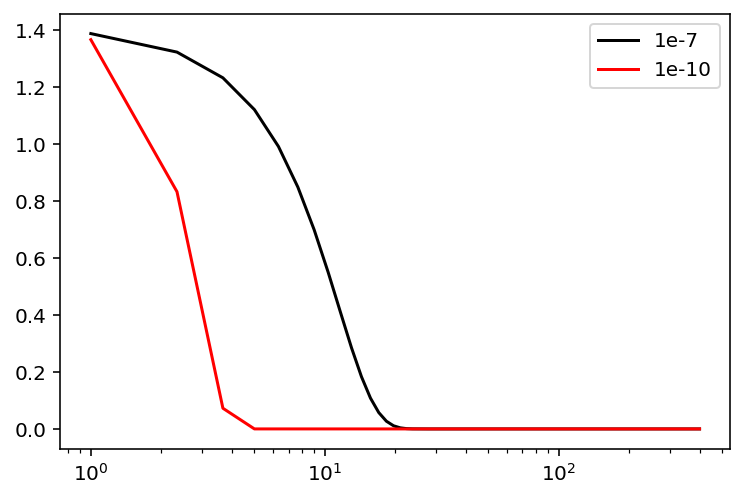

In [5]:
pars1 = camb.CAMBparams()
pars2 = camb.CAMBparams()

pars1.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-7, weylswitch=1)
pars2.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-10, weylswitch=1)

data1= camb.get_background(pars1)
data2= camb.get_background(pars2)

ks=0.1

eta = np.linspace(1, 400, 300)

ev1 = data1.get_time_evolution(ks, eta, 'appscal')
ev2 = data2.get_time_evolution(ks, eta, 'appscal')

plt.plot(eta,ev1, color='k', label='1e-7')
plt.plot(eta,ev2, color='r', label='1e-10')

plt.semilogx()
plt.legend()

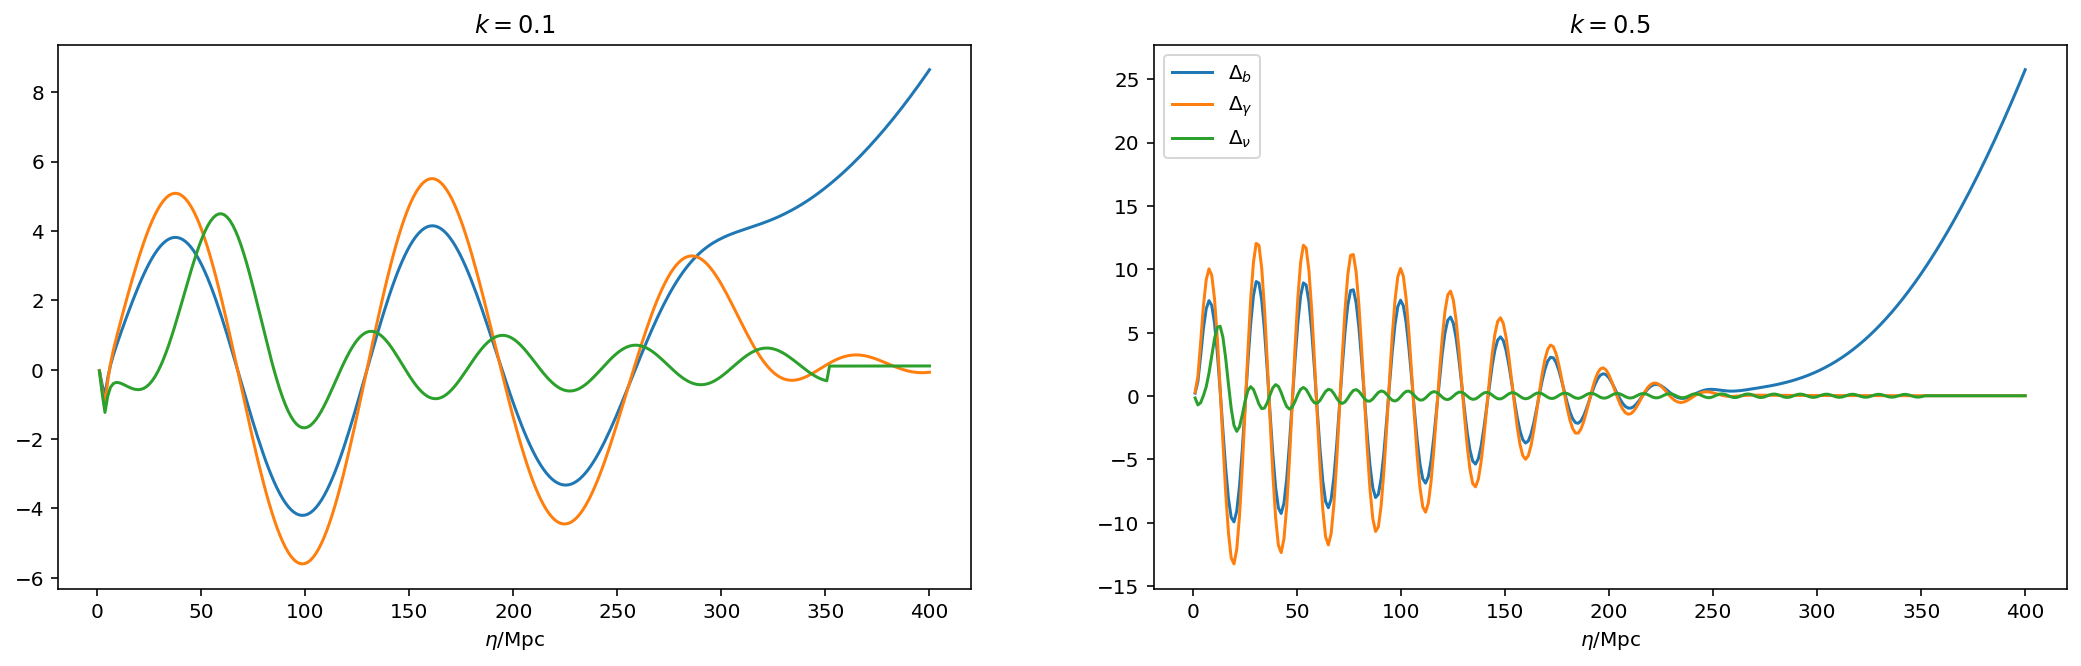

In [56]:
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-10, weylswitch=1)
data= camb.get_background(pars)
eta = np.linspace(1, 400, 300)
ks = [0.1,0.5]
ev = data.get_time_evolution(ks, eta, ['delta_baryon','delta_photon','delta_neutrino'])
_, axs= plt.subplots(1,2, figsize=(18,5))
for i, ax in enumerate(axs):
    ax.plot(eta,ev[i,:, 0])
    ax.plot(eta,ev[i,:, 1])
    ax.plot(eta,ev[i,:, 2])
    ax.set_title('$k= %s$'%ks[i])
    ax.set_xlabel(r'$\eta/\rm{Mpc}$');
plt.legend([r'$\Delta_b$', r'$\Delta_\gamma$', r'$\Delta_\nu$'], loc = 'upper left');

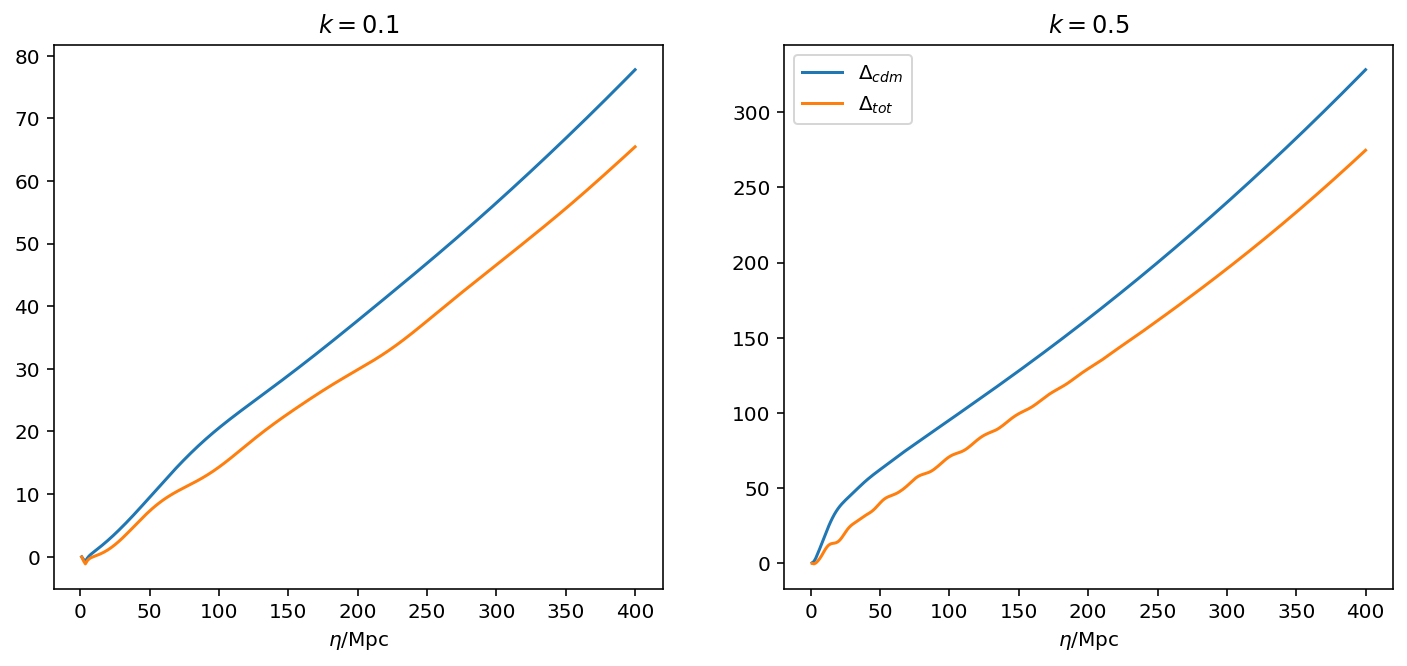

In [57]:
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-10, weylswitch=1)
data= camb.get_background(pars)
eta = np.linspace(1, 400, 300)
ks = [0.1,0.5]
ev = data.get_time_evolution(ks, eta, ['delta_cdm','delta_tot'])
_, axs= plt.subplots(1,2, figsize=(12,5))
for i, ax in enumerate(axs):
    ax.plot(eta,ev[i,:, 0])
    ax.plot(eta,ev[i,:, 1])
    ax.set_title('$k= %s$'%ks[i])
    ax.set_xlabel(r'$\eta/\rm{Mpc}$');
plt.legend([r'$\Delta_{cdm}}$', r'$\Delta_{tot}$'], loc = 'upper left');

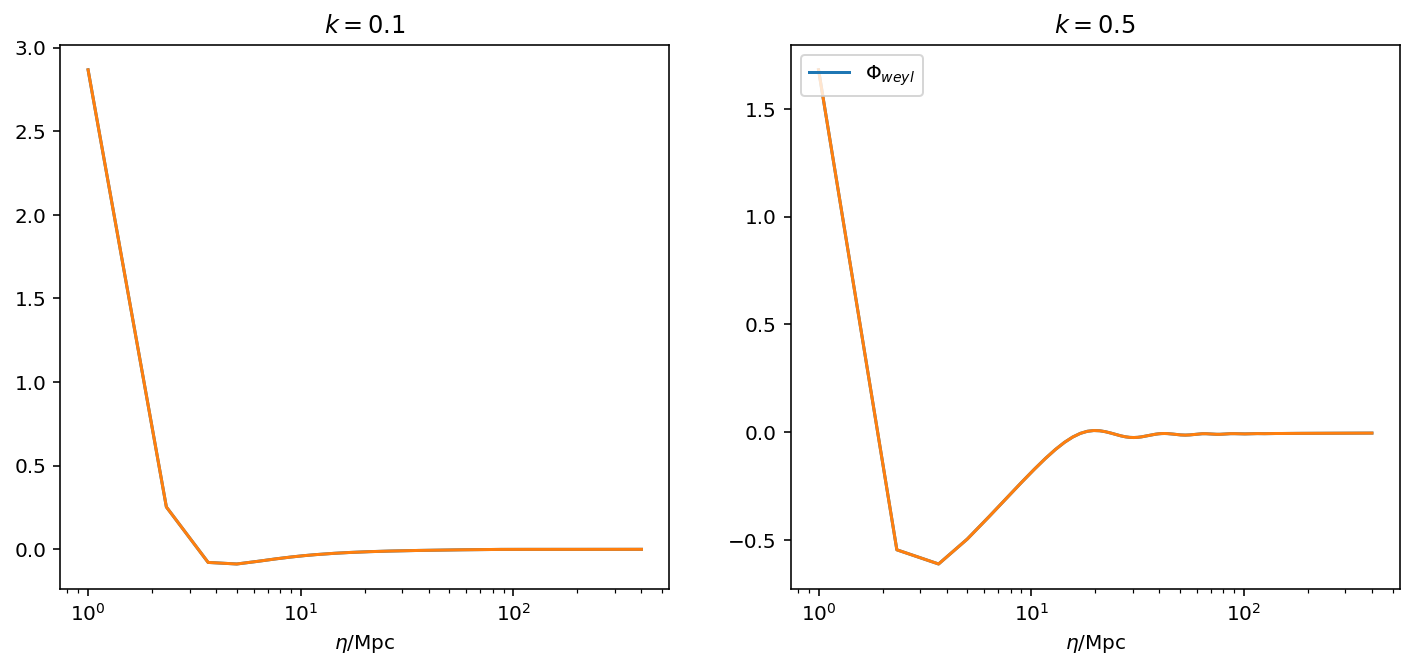

In [58]:
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-10, weylswitch=1)
data= camb.get_background(pars)
eta = np.linspace(1, 400, 300)
ks = [0.1,0.5]
ev = data.get_time_evolution(ks, eta, ['Weyl'])
_, axs= plt.subplots(1,2, figsize=(12,5))
for i, ax in enumerate(axs):
    ax.plot(eta,ev[i,:, 0])
    ax.plot(eta,ev[i,:, 0])
    ax.set_xscale('log')
    ax.set_title('$k= %s$'%ks[i])
    ax.set_xlabel(r'$\eta/\rm{Mpc}$');
plt.legend([r'$\Phi_{weyl}$'], loc = 'upper left');

(2401, 4)


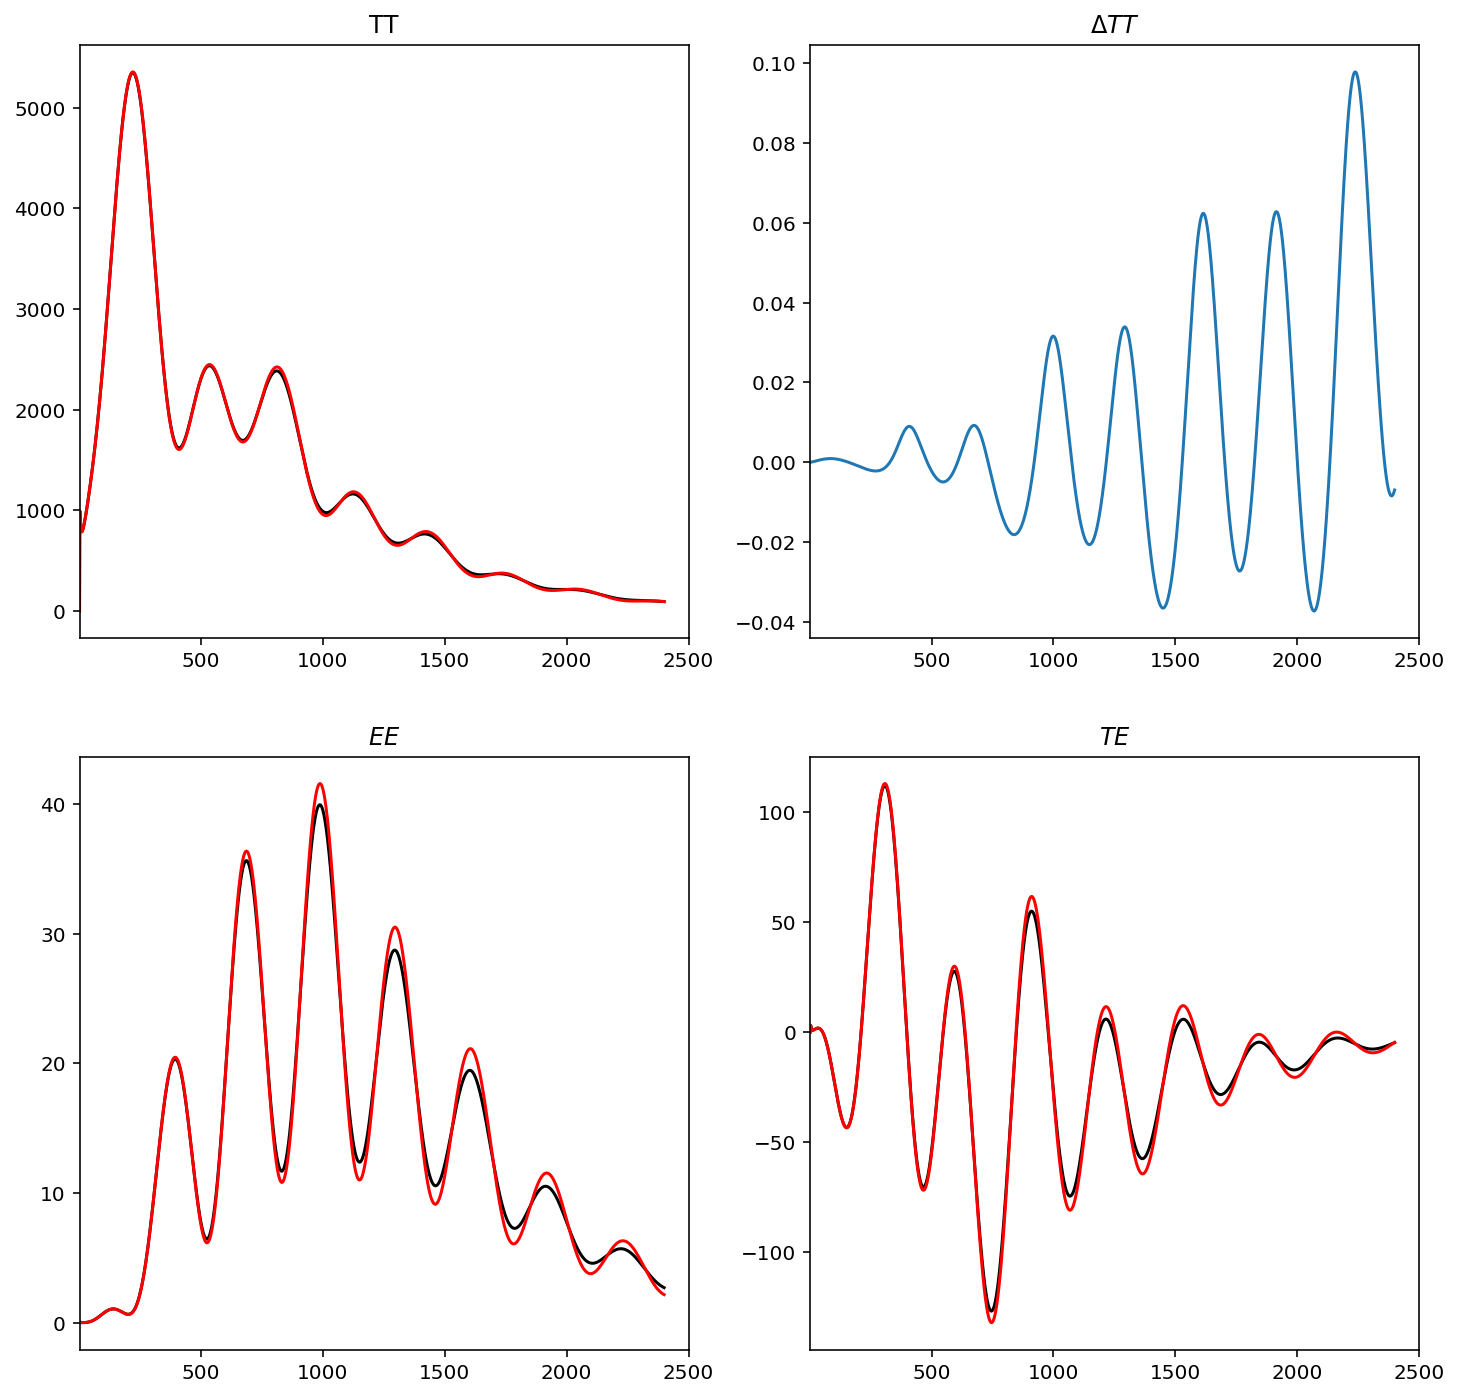

In [7]:
# gr result test
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-10, weylswitch=3)
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='r')
ax[0,0].set_title('TT')
ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[0,1].set_title(r'$\Delta TT$')
ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='r')
ax[1,0].set_title(r'$EE$')
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='r')
ax[1,1].set_title(r'$TE$');
for ax in ax.reshape(-1): ax.set_xlim([2,2500]);

(2, 2500)

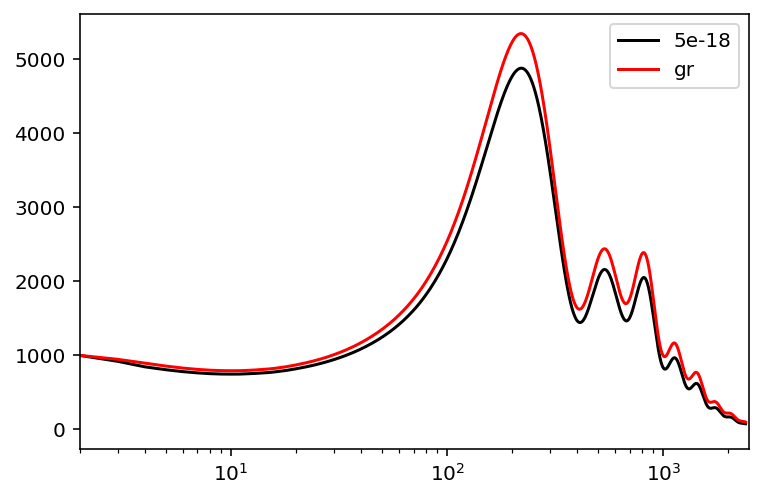

In [17]:
#weyl

pars1 = camb.CAMBparams()
#pars2 = camb.CAMBparams()
pars3 = camb.CAMBparams()

pars1.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-19, weylswitch=1)
#pars2.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-19, weylswitch=1)
pars3.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-13, weylswitch=3)

results1 = camb.get_results(pars1)
#results2 = camb.get_results(pars2)
results3 = camb.get_results(pars3)

powers1 =results1.get_cmb_power_spectra(pars1, CMB_unit='muK')
#powers2 =results2.get_cmb_power_spectra(pars2, CMB_unit='muK')
powers3 =results3.get_cmb_power_spectra(pars3, CMB_unit='muK')

totCL1=powers1['total']
#totCL2=powers2['total']
totCL3=powers3['total']

ls = np.arange(totCL1.shape[0])

plt.plot(ls,totCL1[:,0], color='k', label='1e-19')
#plt.plot(ls,totCL2[:,0], color='k', label='1e-19')
plt.plot(ls,totCL3[:,0], color='r', label='gr')

plt.legend()
plt.semilogx()
plt.xlim(2,2500)

(2, 2500)

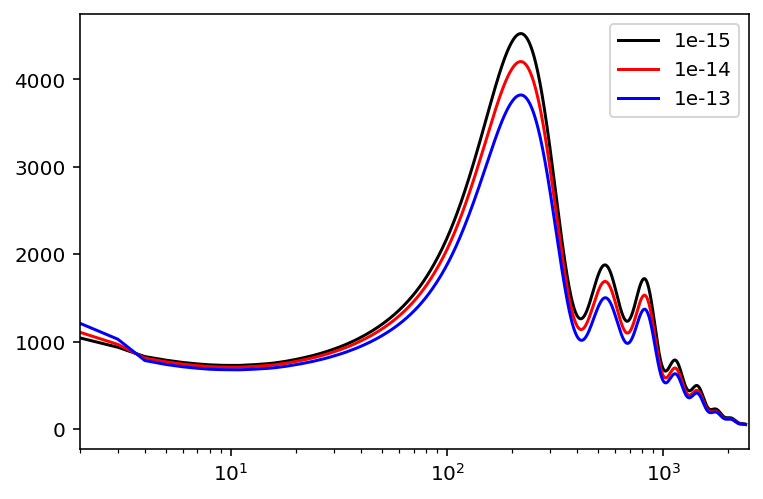

In [9]:
#zee

pars1 = camb.CAMBparams()
pars2 = camb.CAMBparams()
pars3 = camb.CAMBparams()

pars1.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-15, weylswitch=2)
pars2.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-14, weylswitch=2)
pars3.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-13, weylswitch=2)

results1 = camb.get_results(pars1)
results2 = camb.get_results(pars2)
results3 = camb.get_results(pars3)

powers1 =results.get_cmb_power_spectra(pars1, CMB_unit='muK')
powers2 =results.get_cmb_power_spectra(pars2, CMB_unit='muK')
powers3 =results.get_cmb_power_spectra(pars3, CMB_unit='muK')

totCL1=powers1['total']
totCL2=powers2['total']
totCL3=powers3['total']

ls = np.arange(totCL.shape[0])

plt.plot(ls,totCL1[:,0], color='k', label='1e-15')
plt.plot(ls,totCL2[:,0], color='r', label='1e-14')
plt.plot(ls,totCL3[:,0], color='b', label='1e-13')

plt.legend()
plt.semilogx()
plt.xlim(2,2500)

(2401, 4)


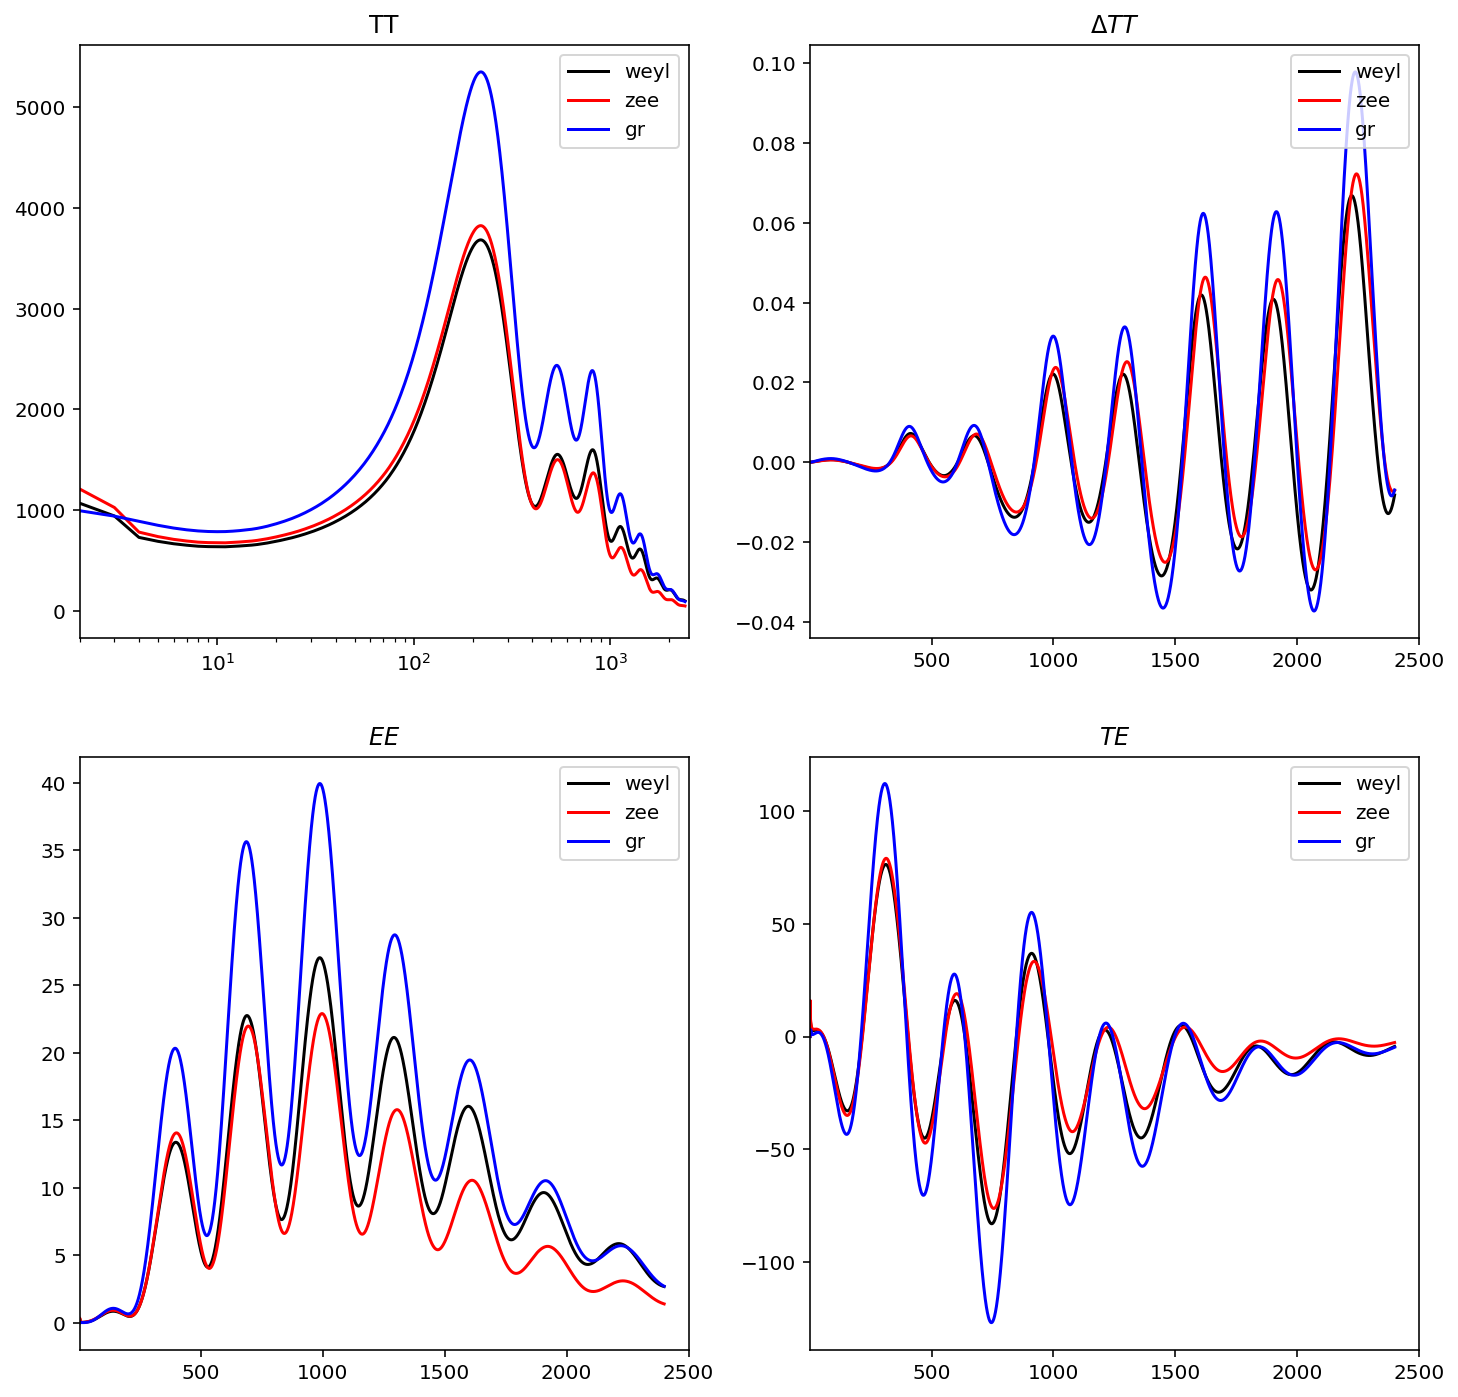

In [11]:
#scalar result compare

pars1 = camb.CAMBparams()
pars2 = camb.CAMBparams()
pars3 = camb.CAMBparams()

pars1.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-13, weylswitch=1)
pars2.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-13, weylswitch=2)
pars3.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-13, weylswitch=3)

results1 = camb.get_results(pars1)
results2 = camb.get_results(pars2)
results3 = camb.get_results(pars3)

powers1 =results.get_cmb_power_spectra(pars1, CMB_unit='muK')
powers2 =results.get_cmb_power_spectra(pars2, CMB_unit='muK')
powers3 =results.get_cmb_power_spectra(pars3, CMB_unit='muK')

totCL1=powers1['total']
totCL2=powers2['total']
totCL3=powers3['total']

unlensedCL1=powers1['unlensed_scalar']
unlensedCL2=powers2['unlensed_scalar']
unlensedCL3=powers3['unlensed_scalar']

ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,totCL1[:,0], color='k', label='weyl')
ax[0,0].plot(ls,totCL2[:,0], color='r', label='zee')
ax[0,0].plot(ls,totCL3[:,0], color='b', label='gr')
ax[0,0].set_xscale('log')
ax[0,0].set_title('TT')
ax[0,1].plot(ls[2:], 1-unlensedCL1[2:,0]/totCL1[2:,0], color='k', label='weyl')
ax[0,1].plot(ls[2:], 1-unlensedCL2[2:,0]/totCL2[2:,0], color='r', label='zee')
ax[0,1].plot(ls[2:], 1-unlensedCL3[2:,0]/totCL3[2:,0], color='b', label='gr')
ax[0,1].set_title(r'$\Delta TT$')
ax[1,0].plot(ls,totCL1[:,1], color='k', label='weyl')
ax[1,0].plot(ls,totCL2[:,1], color='r', label='zee')
ax[1,0].plot(ls,totCL3[:,1], color='b', label='gr')
ax[1,0].set_title(r'$EE$')
ax[1,1].plot(ls,totCL1[:,3], color='k', label='weyl')
ax[1,1].plot(ls,totCL2[:,3], color='r', label='zee')
ax[1,1].plot(ls,totCL3[:,3], color='b', label='gr')
ax[1,1].set_title(r'$TE$');
for ax in ax.reshape(-1):
    ax.set_xlim([2,2500])
    ax.legend(loc="upper right")

In [18]:
#Now get matter power spectra and sigma8 at redshift 0 and 0.8

pars1 = camb.CAMBparams()
pars2 = camb.CAMBparams()
pars3 = camb.CAMBparams()

pars1.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-13, weylswitch=1)
pars2.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-13, weylswitch=2)
pars3.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, scalmass=1e-13, weylswitch=3)

pars1.InitPower.set_params(ns=0.965)
pars2.InitPower.set_params(ns=0.965)
pars3.InitPower.set_params(ns=0.965)

#Note non-linear corrections couples to smaller scales than you want
pars1.set_matter_power(redshifts=[0., 0.8], kmax=2.0)
pars2.set_matter_power(redshifts=[0., 0.8], kmax=2.0)
pars3.set_matter_power(redshifts=[0., 0.8], kmax=2.0)

#Linear spectra
pars1.NonLinear = model.NonLinear_none
pars2.NonLinear = model.NonLinear_none
pars3.NonLinear = model.NonLinear_none

results1 = camb.get_results(pars1)
results2 = camb.get_results(pars2)
results3 = camb.get_results(pars3)

kh1, z1, pk1 = results1.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
kh2, z2, pk2 = results2.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
kh3, z3, pk3 = results3.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

s81 = np.array(results1.get_sigma8())
s82 = np.array(results2.get_sigma8())
s83 = np.array(results3.get_sigma8())

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


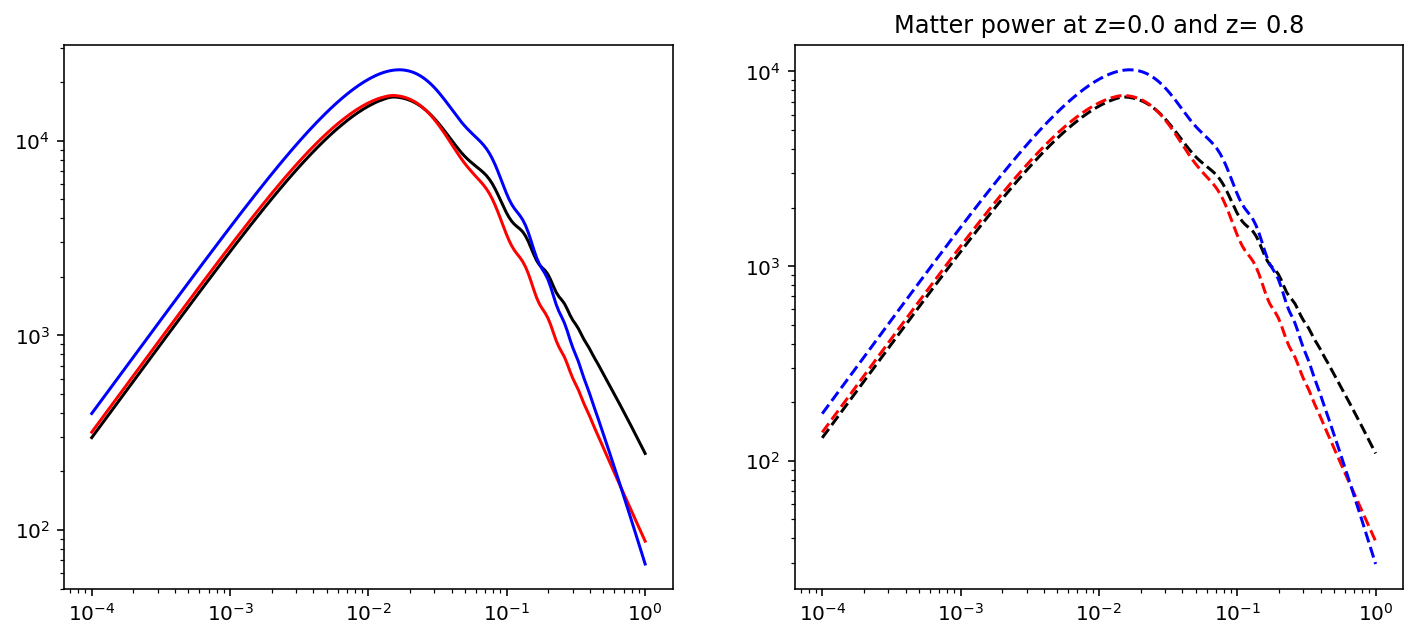

In [55]:
fig, ax= plt.subplots(1,2, figsize=(12,5))
for i, (redshift, line) in enumerate(zip(z1,['-','--'])):
    ax[i].plot(kh1, pk1[i,:], color='k', ls = line)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
for i, (redshift, line) in enumerate(zip(z2,['-','--'])):        
    ax[i].plot(kh2, pk2[i,:], color='r', ls = line)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
for i, (redshift, line) in enumerate(zip(z3,['-','--'])): 
    ax[i].plot(kh3, pk3[i,:], color='b', ls = line)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
plt.title('Matter power at z=%s and z= %s'%tuple(z1));